In [1]:
import sys
sys.path.append("../")

import os

import numpy as np
import random
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

GLOBAL_SEED = 1

os.environ['PYTHONHASHSEED']=str(GLOBAL_SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

#os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # disable GPU
dtype = 'float64'
tf.keras.backend.set_floatx(dtype)

In [2]:
w = np.random.randn(2) * 0.001
b = np.random.randn(1) * 0.001

eps = 1e-4  # vary this parameters: eps \in {1e-4, 1e-3, 1e-2, 1e-1}

In [3]:
os.makedirs("./figs", exist_ok=True)

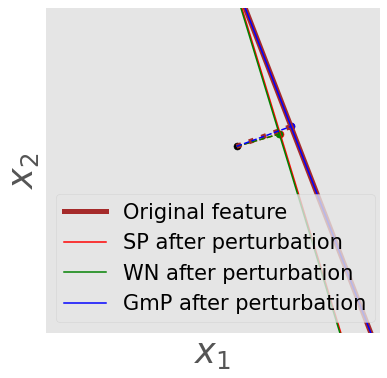

In [4]:
norm_w = np.sqrt(w[0]**2 + w[1]**2)
lambda_ = b[0] / norm_w
theta = np.arccos(w[0] / norm_w)
feature_loc_x = -1.0*lambda_*np.cos(theta)
feature_loc_y = -1.0*lambda_*np.sin(theta)

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
# origin
plt.scatter([0], [0], s=50, c='black')

# original feature
plt.axline([feature_loc_x, feature_loc_y], [(feature_loc_x**2+feature_loc_y**2)/feature_loc_x, 0], label="Original feature", c='brown', linewidth=5)
plt.scatter([feature_loc_x], [feature_loc_y], s=50, c='brown')
plt.plot([0, feature_loc_x], [0, feature_loc_y], c="brown", linestyle="dotted", linewidth=5)

# standard parameterization: perturbed feature
w_eps_std = w + eps
b_eps_std = b + eps
norm_w_eps_std = np.sqrt(w_eps_std[0]**2 + w_eps_std[1]**2)
lambda_eps_std = b_eps_std[0] / norm_w_eps_std
theta_eps_std = np.arccos(w_eps_std[0] / norm_w_eps_std)
feature_loc_x_eps_std = -1.0*lambda_eps_std*np.cos(theta_eps_std)
feature_loc_y_eps_std = -1.0*lambda_eps_std*np.sin(theta_eps_std)
plt.axline([feature_loc_x_eps_std, feature_loc_y_eps_std], [(feature_loc_x_eps_std**2+feature_loc_y_eps_std**2)/feature_loc_x_eps_std, 0], label="SP after perturbation", c='red')
plt.scatter([feature_loc_x_eps_std], [feature_loc_y_eps_std], s=50, c='red')
plt.plot([0, feature_loc_x_eps_std], [0, feature_loc_y_eps_std], c="red", linestyle="dashed")

# weightnorm: perturbed feature
w_eps_bn = (w + eps) / np.sqrt((w+eps)[0]**2 + (w+eps)[1]**2) * (np.sqrt(w[0]**2 + w[1]**2) + eps)
b_eps_bn = b + eps
norm_w_eps_bn = np.sqrt(w_eps_bn[0]**2 + w_eps_bn[1]**2)
lambda_eps_bn = b_eps_bn[0] / norm_w_eps_bn
theta_eps_bn = np.arccos(w_eps_bn[0] / norm_w_eps_bn)
feature_loc_x_eps_bn = -1.0*lambda_eps_bn*np.cos(theta_eps_bn)
feature_loc_y_eps_bn = -1.0*lambda_eps_bn*np.sin(theta_eps_bn)
plt.axline([feature_loc_x_eps_bn, feature_loc_y_eps_bn], [(feature_loc_x_eps_bn**2+feature_loc_y_eps_bn**2)/feature_loc_x_eps_bn, 0], label="WN after perturbation", c='green')
plt.scatter([feature_loc_x_eps_bn], [feature_loc_y_eps_bn], s=50, c='green')
plt.plot([0, feature_loc_x_eps_bn], [0, feature_loc_y_eps_bn], c="green", linestyle="dashed")

# geometric parameterization: perturbed feature
lambda_eps = lambda_ + eps
theta_eps = theta + eps
feature_loc_x_eps = -1.0*lambda_eps*np.cos(theta_eps)
feature_loc_y_eps = -1.0*lambda_eps*np.sin(theta_eps)
plt.axline([feature_loc_x_eps, feature_loc_y_eps], [(feature_loc_x_eps**2+feature_loc_y_eps**2)/feature_loc_x_eps, 0], label="GmP after perturbation", c='blue')
plt.scatter([feature_loc_x_eps], [feature_loc_y_eps], s=50, c='blue')
plt.plot([0, feature_loc_x_eps], [0, feature_loc_y_eps], c="blue", linestyle="dashed")


plt.xlim(-1.0, 0.75)
plt.ylim(-1.0, 0.75)
if eps == 1e-4:
    plt.legend(fontsize=21, loc="lower left")
plt.xlabel("$x_1$", fontsize=35)
plt.ylabel("$x_2$", fontsize=35)
plt.xticks([])
plt.yticks([])
plt.grid(True)
# plt.savefig("./figs/parameter_perturbation_{}.pdf".format(eps), format="pdf", bbox_inches="tight")